### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第77天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/06/05
### 改版日期:  
### 改版備註:

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

### ANS:

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 122s 1us/step


In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model    
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 161us/step - loss: 2.2660 - accuracy: 0.1694 - val_loss: 2.2198 - val_accuracy: 0.2017
Epoch 2/500
50000/50000 [==============================] - 8s 167us/step - loss: 2.1858 - accuracy: 0.2233 - val_loss: 2.1557 - val_accuracy: 0.2402
Epoch 3/500
50000/50000 [==============================] - 9s 171us/step - loss: 2.1286 - accuracy: 0.2506 - val_loss: 2.1058 - val_accuracy: 0.2561
Epoch 4/500
50000/50000 [==============================] - 9s 175us/step - loss: 2.0833 - accuracy: 0.2678 - val_loss: 2.0657 - val_accuracy: 0.2810
Epoch 5/500
50000/50000 [==============================] - 9s 184us/step - loss: 2.0462 - accuracy: 0.2846 - val_loss: 2.0318 - val_accuracy: 0.2906
Epoch 6/500
50000/50000 [==============================] - 10s 191us/step - loss: 2.0146 - accuracy: 0.2968 - val_loss: 2.0030 - val_accuracy: 0.2957
Epoch 7/500
50000/50000 [==============================

50000/50000 [==============================] - 9s 175us/step - loss: 1.6581 - accuracy: 0.4214 - val_loss: 1.6672 - val_accuracy: 0.4156
Epoch 56/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.6548 - accuracy: 0.4237 - val_loss: 1.6631 - val_accuracy: 0.4172
Epoch 57/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.6518 - accuracy: 0.4248 - val_loss: 1.6591 - val_accuracy: 0.4154
Epoch 58/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.6488 - accuracy: 0.4260 - val_loss: 1.6572 - val_accuracy: 0.4201
Epoch 59/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.6456 - accuracy: 0.4267 - val_loss: 1.6545 - val_accuracy: 0.4212
Epoch 60/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.6428 - accuracy: 0.4285 - val_loss: 1.6501 - val_accuracy: 0.4226
Epoch 61/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.6398 - accuracy: 0.4290 - val

50000/50000 [==============================] - 10s 199us/step - loss: 1.5260 - accuracy: 0.4688 - val_loss: 1.5530 - val_accuracy: 0.4591
Epoch 110/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.5241 - accuracy: 0.4692 - val_loss: 1.5461 - val_accuracy: 0.4605
Epoch 111/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.5222 - accuracy: 0.4710 - val_loss: 1.5451 - val_accuracy: 0.4623
Epoch 112/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.5203 - accuracy: 0.4701 - val_loss: 1.5452 - val_accuracy: 0.4600
Epoch 113/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.5186 - accuracy: 0.4712 - val_loss: 1.5407 - val_accuracy: 0.4621
Epoch 114/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.5164 - accuracy: 0.4726 - val_loss: 1.5381 - val_accuracy: 0.4647
Epoch 115/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.5145 - accuracy:

50000/50000 [==============================] - 9s 190us/step - loss: 1.4357 - accuracy: 0.5001 - val_loss: 1.4925 - val_accuracy: 0.4740 l
Epoch 163/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.4341 - accuracy: 0.5004 - val_loss: 1.4805 - val_accuracy: 0.4814
Epoch 164/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.4326 - accuracy: 0.5014 - val_loss: 1.4830 - val_accuracy: 0.4756
Epoch 165/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4308 - accuracy: 0.5019 - val_loss: 1.4826 - val_accuracy: 0.4753
Epoch 166/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4293 - accuracy: 0.5031 - val_loss: 1.4783 - val_accuracy: 0.4790
Epoch 167/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.4277 - accuracy: 0.5030 - val_loss: 1.4755 - val_accuracy: 0.4825
Epoch 168/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4262 - accuracy: 0.5

50000/50000 [==============================] - 9s 188us/step - loss: 1.3566 - accuracy: 0.5265 - val_loss: 1.4409 - val_accuracy: 0.4909
Epoch 217/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.3558 - accuracy: 0.5253 - val_loss: 1.4333 - val_accuracy: 0.4947
Epoch 218/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.3541 - accuracy: 0.5266 - val_loss: 1.4279 - val_accuracy: 0.4933
Epoch 219/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.3528 - accuracy: 0.5282 - val_loss: 1.4349 - val_accuracy: 0.4925
Epoch 220/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.3515 - accuracy: 0.5289 - val_loss: 1.4266 - val_accuracy: 0.4971
Epoch 221/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.3500 - accuracy: 0.5283 - val_loss: 1.4257 - val_accuracy: 0.4946
Epoch 222/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.3490 - accuracy: 0.5298

50000/50000 [==============================] - 10s 199us/step - loss: 1.2869 - accuracy: 0.5506 - val_loss: 1.3902 - val_accuracy: 0.5079
Epoch 271/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.2857 - accuracy: 0.5493 - val_loss: 1.3885 - val_accuracy: 0.5079
Epoch 272/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.2848 - accuracy: 0.5518 - val_loss: 1.4193 - val_accuracy: 0.4978
Epoch 273/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.2846 - accuracy: 0.5505 - val_loss: 1.3920 - val_accuracy: 0.5063
Epoch 274/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.2823 - accuracy: 0.5511 - val_loss: 1.3953 - val_accuracy: 0.5024
Epoch 275/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.2808 - accuracy: 0.5515 - val_loss: 1.4055 - val_accuracy: 0.5025
Epoch 276/500
50000/50000 [==============================] - 11s 212us/step - loss: 1.2793 - accuracy:

50000/50000 [==============================] - 12s 233us/step - loss: 1.2238 - accuracy: 0.5703 - val_loss: 1.3846 - val_accuracy: 0.5068
Epoch 325/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.2219 - accuracy: 0.5726 - val_loss: 1.3670 - val_accuracy: 0.5155
Epoch 326/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.2225 - accuracy: 0.5719 - val_loss: 1.3672 - val_accuracy: 0.5113
Epoch 327/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2206 - accuracy: 0.5740 - val_loss: 1.3604 - val_accuracy: 0.5175
Epoch 328/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.2197 - accuracy: 0.5730 - val_loss: 1.3695 - val_accuracy: 0.5148
Epoch 329/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.2185 - accuracy: 0.5731 - val_loss: 1.3655 - val_accuracy: 0.5190
Epoch 330/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2168 - accuracy: 0.574

50000/50000 [==============================] - 10s 201us/step - loss: 1.1633 - accuracy: 0.5938 - val_loss: 1.3800 - val_accuracy: 0.5100
Epoch 379/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.1638 - accuracy: 0.5928 - val_loss: 1.3419 - val_accuracy: 0.5247
Epoch 380/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.1612 - accuracy: 0.5951 - val_loss: 1.3440 - val_accuracy: 0.5259
Epoch 381/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.1599 - accuracy: 0.5943 - val_loss: 1.3715 - val_accuracy: 0.5147
Epoch 382/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.1590 - accuracy: 0.5938 - val_loss: 1.3613 - val_accuracy: 0.5188
Epoch 383/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.1590 - accuracy: 0.5947 - val_loss: 1.4043 - val_accuracy: 0.5123
Epoch 384/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.1571 - accuracy:

50000/50000 [==============================] - 10s 195us/step - loss: 1.1059 - accuracy: 0.6142 - val_loss: 1.3421 - val_accuracy: 0.5259
Epoch 433/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.1069 - accuracy: 0.6133 - val_loss: 1.3519 - val_accuracy: 0.5215
Epoch 434/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.1045 - accuracy: 0.6138 - val_loss: 1.3745 - val_accuracy: 0.5158
Epoch 435/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.1031 - accuracy: 0.6150 - val_loss: 1.3369 - val_accuracy: 0.5256
Epoch 436/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.1021 - accuracy: 0.6147 - val_loss: 1.3556 - val_accuracy: 0.5157
Epoch 437/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.1013 - accuracy: 0.6141 - val_loss: 1.3516 - val_accuracy: 0.5237
Epoch 438/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.1014 - accuracy: 0.

50000/50000 [==============================] - 9s 183us/step - loss: 1.0512 - accuracy: 0.6325 - val_loss: 1.3553 - val_accuracy: 0.5221
Epoch 487/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.0477 - accuracy: 0.6340 - val_loss: 1.3516 - val_accuracy: 0.5215
Epoch 488/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.0493 - accuracy: 0.6346 - val_loss: 1.3548 - val_accuracy: 0.5234
Epoch 489/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.0499 - accuracy: 0.6343 - val_loss: 1.3220 - val_accuracy: 0.5334
Epoch 490/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.0461 - accuracy: 0.6360 - val_loss: 1.3320 - val_accuracy: 0.5377
Epoch 491/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.0464 - accuracy: 0.6352 - val_loss: 1.3323 - val_accuracy: 0.5352
Epoch 492/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.0441 - accuracy: 0.6357

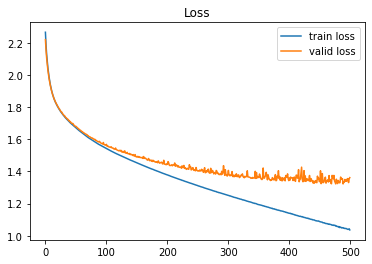

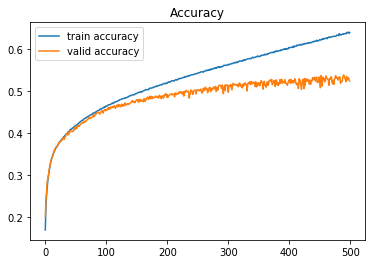

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()